<a href="https://colab.research.google.com/github/MarcosP7635/Energy/blob/main/Neutron_Reactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How much energy does it take to accelerate a neutron through a solenoid? The force $F$ on a neutron with magnetic moment $\mu$ in a magnetic field $B$ is 
\begin{equation}
\begin{split} 
F = \nabla (\mu\cdot B)\\
\end{split}
\end{equation}
At first, the angular momentum is 




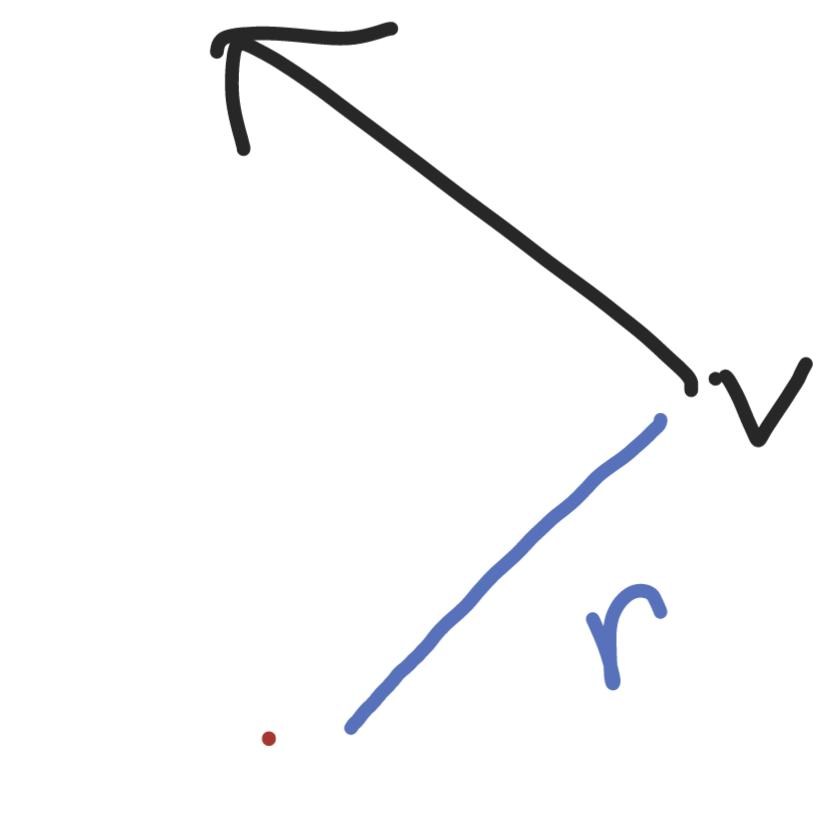

Since it the neutron is travelling at constant velocity in a circular loop, we have where $m_n$ is the mass of the neutron
\begin{equation}
\begin{split}
F = \frac{m_n v^2}{r} = \nabla (\mu\cdot B)\\
\end{split}
\end{equation}
Assuming the magnetic moment is aligned with the magnetic field we have
\begin{equation}
\begin{split}
F = \frac{m_n v^2}{r} = \mu\nabla B \\
\frac{m_n v^2}{r\mu} = \nabla B \\
\end{split}
\end{equation}



A magnet with radius on the order of 1 $\mu\text m$ can have a magnetic field on its surface with a gradient that has been independently simulated and measured to be $ > 10^5$ T/m. 

Sources:

https://dx.doi.org/10.1063/1.4886375 (Dempsey et. al. Applied Physics Letters. 2014.)

https://doi.org/10.1063/1.3486513 (Kustov et. al. Journal of Applied Physics. 2010.)



Astropy documentation:

https://docs.astropy.org/en/stable/units/index.html

https://docs.astropy.org/en/stable/constants/index.html?highlight=constants

In [9]:
import astropy
import astropy.units as units
import astropy.constants as constants
import numpy as np
import subprocess
from sympy.abc import *
import sympy
running_on_colab = not "JupyterNotebooks" in subprocess.os.getcwd()
if running_on_colab:
    running_on_colab = True
    parent_dir = "/content/"
else:
    parent_dir = subprocess.os.getcwd().split("JupyterNotebooks")[0]
    sep_char = parent_dir.split("Energy")[-1]
parent_dir

'c:\\Users\\engin\\Documents\\GitHub\\Energy\\'

Source: CODATA

In [17]:
mu = -0.96623651*(10**-26) * units.J / units.Tesla
mu

<Quantity -9.6623651e-27 J / T>

In [16]:
m_n = constants.m_n
m_n

<<class 'astropy.constants.codata2018.CODATA2018'> name='Neutron mass' value=1.67492749804e-27 uncertainty=9.5e-37 unit='kg' reference='CODATA 2018'>

First we will only consider thermal neutrons, which are nonerelativistic.

In [21]:
v = np.sqrt(2 * .025 * units.eV / m_n).to(units.meter / units.second)
v

<Quantity 2186.96681302 m / s>

We now take the radius of the orbit to be 30 $\mu\text m$

In [27]:
r = (30 * units.micron).to(units.meter)
gradB = -(m_n * v**2 / (r * mu)).to(units.T / units.m)
np.log10(gradB / (10**5 * units.T / units.m))

<Quantity 5.4414757>

Thus thermal neutrons are 5 orders of magnitude away. We would need the neutrons to be 300 times slower and thus have an energy $2.5 \times 10^{-7}$ eV 